# Exploratory Notebook for Dandiset 001275: *Mental navigation primate PPC Neupane_Fiete_Jazayeri*

**DISCLAIMER:**
This notebook was AI-generated using `dandi-notebook-gen`. The content and code snippets have **not been fully verified**. Please review carefully and exercise caution when interpreting the code or analysis results.

---

**Dataset Description:**
> This dataset contains neurophysiology data collected from two primates during a mental navigation task associated with a previously published study ([Nature 2024](https://doi.org/10.1038/s41586-024-07557-z)). Included are extracellular electrophysiological recordings, behavioral data (eye and hand position), and trial/task information.

- **Dataset Identifier:** DANDI:001275 (draft)
- **Contributors:** Neupane, Sujaya
- **Institution:** MIT (Lab of Jazayeri and Fiete)
- **Species:** *Macaca mulatta*
- **License:** CC-BY-4.0
- **Related datasets:** Entorhinal cortex data [DANDI:000897](https://doi.org/10.48324/dandi.000897/0.240605.1710)

## Setup

This notebook assumes you have the following packages pre-installed:
- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `numpy`
- `matplotlib`
- `seaborn`

You might want to use a virtual environment with these packages installed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pynwb
import h5py
import remfile
from dandi.dandiapi import DandiAPIClient

sns.set_theme()

## List Dandiset Assets
Using the DANDI API to list files available in this dataset.

In [2]:
client = DandiAPIClient()
dandiset = client.get_dandiset("001275", "draft")
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in DANDI:001275")
for asset in assets[:5]:  # Display first 5 asset paths as example
    print(asset.path)

Found 20 assets in DANDI:001275
sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb
sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb


## Select NWB File for Exploration
We will analyze a combined behavior + ecephys NWB file:

`sub-amadeus/sub-amadeus_ses-01042020_behavior+ecephys.nwb`

In [3]:
nwb_url = "https://api.dandiarchive.org/api/assets/b0bbeb4c-5e0d-4050-a993-798173797d94/download/"

file_obj = remfile.File(nwb_url)
h5file = h5py.File(file_obj)
io = pynwb.NWBHDF5IO(file=h5file)
nwbfile = io.read()
print("Loaded NWB file successfully")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Loaded NWB file successfully


## NWB session metadata

In [4]:
print("Session description:", nwbfile.session_description)
print("Identifier:", nwbfile.identifier)
print("Session start time:", nwbfile.session_start_time)
print("Subject ID:", nwbfile.subject.subject_id)
print("Species:", nwbfile.subject.species)
print("Subject age:", nwbfile.subject.age)
print("Subject sex:", nwbfile.subject.sex)

Session description: Data from macaque performing mental navigation task. Subject is presented with a start and a target landmark, sampled from a linear map of 6 landmarks on a screen. After a delay, the subject is then cued with a go signal to navigate from start to target landmark with a joystick. Subject should respond by deflecting the joystick in the right direction and holding it until the subject thinks it has arrived at the target landmark. The visual drift or intervening landmarks are all occluded from view making the task a purely mental navigation.
Identifier: 15de6847-1f57-4247-847b-af4b179d1b7c
Session start time: 2020-01-04 00:00:00-05:00
Subject ID: amadeus
Species: Macaca mulatta
Subject age: P10Y
Subject sex: M


## Trials Table

In [5]:
print("Trials:", nwbfile.trials)
print("Trials description:", nwbfile.trials.description)
print("Fields in trials table:", nwbfile.trials.colnames)

n_trials = len(nwbfile.trials.id)
print(f"Number of trials: {n_trials}")

Trials: trials pynwb.epoch.TimeIntervals at 0x131811159597344
Fields:
  colnames: ['start_time' 'stop_time' 'ta' 'tp' 'curr' 'target' 'rt' 'delay'
 'trial_type' 'seqq' 'succ' 'attempt' 'numrepeat' 'validtrials_mm'
 'gocuettl' 'joy1offttl' 'joy1onttl' 'stim1onttl']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    ta <class 'hdmf.common.table.VectorData'>,
    tp <class 'hdmf.common.table.VectorData'>,
    curr <class 'hdmf.common.table.VectorData'>,
    target <class 'hdmf.common.table.VectorData'>,
    rt <class 'hdmf.common.table.VectorData'>,
    delay <class 'hdmf.common.table.VectorData'>,
    trial_type <class 'hdmf.common.table.VectorData'>,
    seqq <class 'hdmf.common.table.VectorData'>,
    succ <class 'hdmf.common.table.VectorData'>,
    attempt <class 'hdmf.common.table.VectorData'>,
    numrepeat <class 'hdmf.common.table.VectorData'>,
    validtrials_mm <class 'hdmf.common.table.VectorData'>,
    

## Electrode metadata

In [6]:
print("Electrode groups:", list(nwbfile.electrode_groups.keys()))
print("Number of electrodes:", len(nwbfile.electrodes.id))
print("Electrode columns:", nwbfile.electrodes.colnames)

Electrode groups: ['vprobe0']
Number of electrodes: 32
Electrode columns: ('location', 'group', 'group_name', 'channel_name', 'rel_x', 'offset_to_uV', 'rel_y', 'gain_to_uV')


## Behavioral data: Eye position

We will visualize a brief segment (first ∼5 seconds) of eye position during the session.

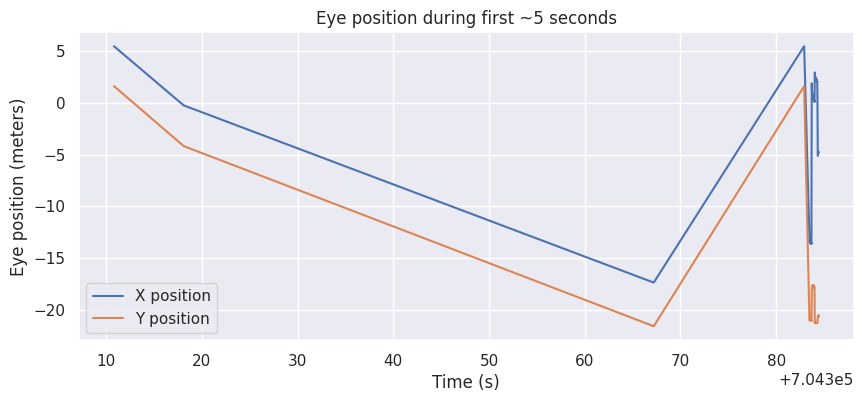

In [7]:
eye = nwbfile.processing['behavior'].data_interfaces['eye_position']
eye_data_ds = eye.data
timestamps_ds = eye.timestamps

n_display = 1000  # e.g., show first 1000 samples (~5 seconds depending on rate)
eye_data = eye_data_ds[:n_display, :]
eye_times = timestamps_ds[:n_display]

plt.figure(figsize=(10, 4))
plt.plot(eye_times, eye_data[:, 0], label="X position")
plt.plot(eye_times, eye_data[:, 1], label="Y position")
plt.xlabel("Time (s)")
plt.ylabel("Eye position (meters)")
plt.title("Eye position during first ~5 seconds")
plt.legend()
plt.show()

## Behavioral data: Hand position

Similarly, plot initial snippet of hand position data captured by joystick potentiometer.

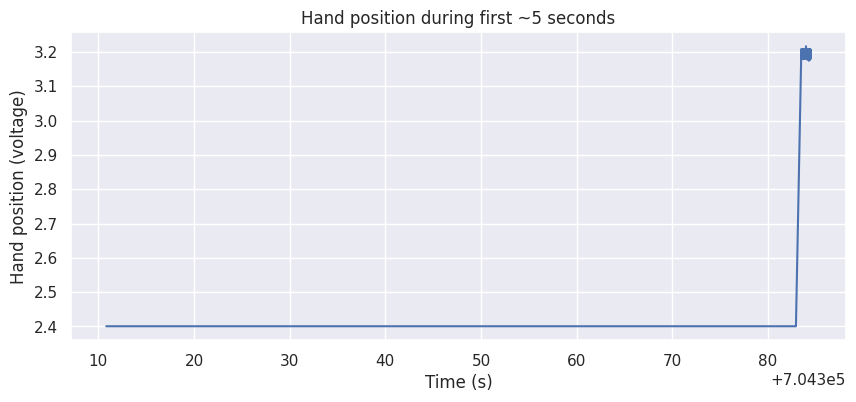

In [8]:
hand = nwbfile.processing['behavior'].data_interfaces['hand_position']
hand_data_ds = hand.data
hand_times_ds = hand.timestamps

n_display = 1000
hand_data = hand_data_ds[:n_display]
hand_times = hand_times_ds[:n_display]

plt.figure(figsize=(10, 4))
plt.plot(hand_times, hand_data)
plt.xlabel("Time (s)")
plt.ylabel("Hand position (voltage)")
plt.title("Hand position during first ~5 seconds")
plt.show()

## Electrophysiology Data and Units Table

Here, we summarize information about the units.

In [9]:
units = nwbfile.processing['ecephys'].data_interfaces['units']
print("Units description:", units.description)
print("Columns in units table:", units.colnames)
print("Number of units:", len(units.id))

Units description: Autogenerated by neuroconv.
Columns in units table: ('spike_times', 'unit_name', 'amp', 'ch', 'ContamPct', 'original_cluster_id', 'Amplitude', 'n_spikes', 'depth', 'quality', 'sh', 'KSLabel', 'fr')
Number of units: 68


## Summary

This notebook connected to a remote DANDI dataset, loaded an example NWB file, displayed metadata, and plotted short excerpts from behavioral data streams (eye, hand position).

Researchers may extend this notebook with more detailed or customized analyses, filtering, or visualization workflows based on their interests.

In [10]:
# Close the NWB file and file handlers when done
io.close()
h5file.close()
file_obj.close()